<a href="https://colab.research.google.com/github/berberberk/timl-fs-2024/blob/main/TIML7_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](https://www.kidneyfund.org/sites/default/files/styles/og_image/public/media/images/Kidneys/red-and-blue-kidneys.jpeg?itok=6uREeRa5)

In [ ]:
#@title Импорт библиотек

import kagglehub
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.feature_selection import RFE, SequentialFeatureSelector
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
import seaborn as sns
import shap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/chronic-kidney-disease-dataset-analysis", path='Chronic_Kidney_Dsease_data.csv')

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis/versions/1/Chronic_Kidney_Dsease_data.csv


In [ ]:
df = pd.read_csv(path)

print("Размер данных:", df.shape)
print("Признаки данных:", df.columns)

Размер данных: (1659, 54)
Признаки данных: Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
     

* PatientID: A unique identifier assigned to each patient (1 to 1,659).
* Age: The age of the patients ranges from 20 to 90 years.
* Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
* Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other
* SocioeconomicStatus: The socioeconomic status of the patients
* EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher
* BMI: Body Mass Index of the patients, ranging from 15 to 40.
* Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
* AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
* PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
* DietQuality: Diet quality score, ranging from 0 to 10.
* SleepQuality: Sleep quality score, ranging from 4 to 10.
* FamilyHistoryKidneyDisease: Family history of kidney disease, where 0 * indicates No and 1 indicates Yes.
* FamilyHistoryHypertension: Family history of hypertension, where 0 indicates No and 1 indicates Yes.
* FamilyHistoryDiabetes: Family history of diabetes, where 0 indicates No and 1 indicates Yes.
* PreviousAcuteKidneyInjury: History of previous acute kidney injury, where 0 indicates No and 1 indicates Yes.
* UrinaryTractInfections: History of urinary tract infections, where 0 indicates No and 1 indicates Yes.
* SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
* DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
* FastingBloodSugar: Fasting blood sugar levels, ranging from 70 to 200 mg/dL.
* HbA1c: Hemoglobin A1c levels, ranging from 4.0% to 10.0%.
* SerumCreatinine: Serum creatinine levels, ranging from 0.5 to 5.0 mg/dL.
* BUNLevels: Blood Urea Nitrogen levels, ranging from 5 to 50 mg/dL.
* GFR: Glomerular Filtration Rate, ranging from 15 to 120 mL/min/1.73 m².
* ProteinInUrine: Protein levels in urine, ranging from 0 to 5 g/day.
* ACR: Albumin-to-Creatinine Ratio, ranging from 0 to 300 mg/g.
* SerumElectrolytesSodium: Serum sodium levels, ranging from 135 to 145 mEq/L.
* SerumElectrolytesPotassium: Serum potassium levels, ranging from 3.5 to 5.5 mEq/L.
* SerumElectrolytesCalcium: Serum calcium levels, ranging from 8.5 to 10.5 mg/dL.
* SerumElectrolytesPhosphorus: Serum phosphorus levels, ranging from 2.5 to 4.5 mg/dL.
* HemoglobinLevels: Hemoglobin levels, ranging from 10 to 18 g/dL.
* CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
* CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
* CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
* CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.
* ACEInhibitors: Use of ACE inhibitors, where 0 indicates No and 1 indicates Yes.
* Diuretics: Use of diuretics, where 0 indicates No and 1 indicates Yes.
* NSAIDsUse: Frequency of NSAIDs use, ranging from 0 to 10 times per week.
* Statins: Use of statins, where 0 indicates No and 1 indicates Yes.
* AntidiabeticMedications: Use of antidiabetic medications, where 0 indicates No and 1 indicates Yes.
* Edema: Presence of edema, where 0 indicates No and 1 indicates Yes.
* FatigueLevels: Fatigue levels, ranging from 0 to 10.
* NauseaVomiting: Frequency of nausea and vomiting, ranging from 0 to 7 times per week.
* MuscleCramps: Frequency of muscle cramps, ranging from 0 to 7 times per week.
* Itching: Itching severity, ranging from 0 to 10.
* QualityOfLifeScore: Quality of life score, ranging from 0 to 100.
* HeavyMetalsExposure: Exposure to heavy metals, where 0 indicates No and 1 indicates Yes.

In [ ]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [ ]:
target = df['Diagnosis']

In [ ]:
df = df.drop(['DoctorInCharge', 'Diagnosis', 'PatientID'], axis=1)

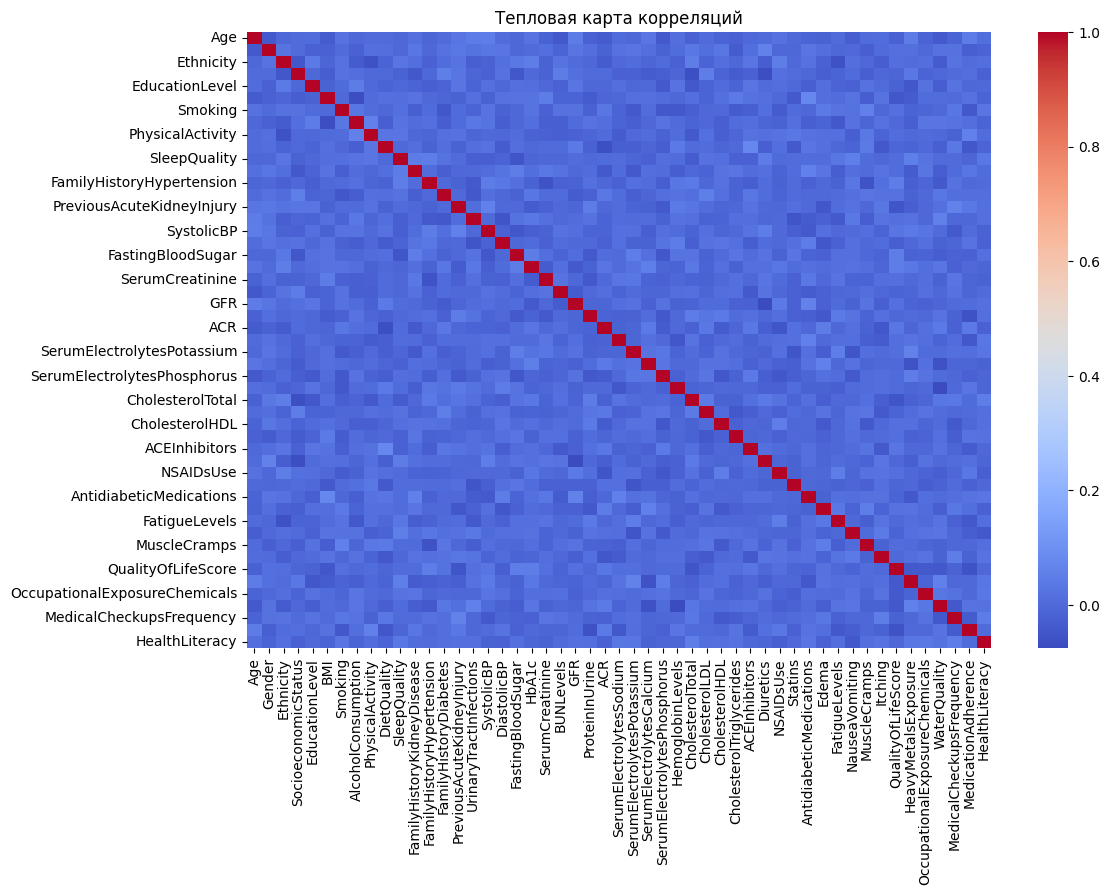

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()

In [ ]:
def corr_filter(x: pd.DataFrame, bound: float):
    x_corr = x.corr()
    x_filtered = x_corr[((x_corr >= bound) | (x_corr <= -bound)) & (x_corr !=1.000)]
    x_flattened = x_filtered.unstack().sort_values().drop_duplicates()
    return x_flattened

corr_filter(df, .06)

,,0
Diuretics,GFR,-0.074593
WaterQuality,HemoglobinLevels,-0.071032
BMI,AlcoholConsumption,-0.067239
Diuretics,SocioeconomicStatus,-0.067039
DietQuality,ACR,-0.063485
SocioeconomicStatus,CholesterolTotal,-0.062895
WaterQuality,SerumElectrolytesCalcium,-0.061142
Ethnicity,FatigueLevels,-0.060223
MedicalCheckupsFrequency,PreviousAcuteKidneyInjury,0.060133
HeavyMetalsExposure,SerumElectrolytesPotassium,0.060916


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#@title p-value
# Добавляем константу
X_train_sm = sm.add_constant(X_train_scaled)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

# Отбор признаков по p-value
significant_features = np.where(result.pvalues < 0.05)[0]
X_train_significant = X_train_scaled[:, significant_features]
X_test_significant = X_test_scaled[:, significant_features]

Optimization terminated successfully.
         Current function value: 0.196856
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 1327
Model:                          Logit   Df Residuals:                     1275
Method:                           MLE   Df Model:                           51
Date:                Mon, 23 Dec 2024   Pseudo R-squ.:                  0.3155
Time:                        06:36:56   Log-Likelihood:                -261.23
converged:                       True   LL-Null:                       -381.63
Covariance Type:            nonrobust   LLR p-value:                 1.967e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6475      0.210     17.356      0.000       3.236       4.059
x1            -0.0486      0.

In [ ]:
print(df.iloc[:, significant_features].columns)
df.iloc[:, significant_features].shape

Index(['Age', 'AlcoholConsumption', 'SleepQuality', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'CholesterolTotal', 'Itching',
       'QualityOfLifeScore'],
      dtype='object')


(1659, 14)

In [ ]:
#@title Жадный алгоритм
log_reg = LogisticRegression()
sfs = SequentialFeatureSelector(log_reg, direction="forward", cv=5, scoring="f1")
sfs.fit(X_train_scaled, y_train)

selected_features = sfs.get_support(indices=True)
X_train_sfs = X_train_scaled[:, selected_features]
X_test_sfs = X_test_scaled[:, selected_features]



Index(['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
       'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease',
       'FamilyHistoryHypertension', 'FamilyHistoryDiabetes',
       'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP',
       'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'ProteinInUrine',
       'SerumElectrolytesPotassium', 'CholesterolHDL', 'MuscleCramps',
       'WaterQuality'],
      dtype='object')

In [ ]:
print(df.iloc[:, selected_features].columns)
df.iloc[:, selected_features].shape

Index(['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
       'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease',
       'FamilyHistoryHypertension', 'FamilyHistoryDiabetes',
       'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP',
       'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'ProteinInUrine',
       'SerumElectrolytesPotassium', 'CholesterolHDL', 'MuscleCramps',
       'WaterQuality'],
      dtype='object')


(1659, 25)

In [ ]:
#@title Lasso
alphas = np.logspace(-4, 0, 50)
lasso = LassoCV(alphas=alphas, cv=5).fit(X_train_scaled, y_train)

# Количество зануленных признаков
n_zero_coeffs = np.sum(lasso.coef_ == 0)
print(f"Число зануленных признаков при alpha={lasso.alpha_}: {n_zero_coeffs}")

# Отбор значимых признаков
selected_lasso_features = np.where(lasso.coef_ != 0)[0]
X_train_lasso = X_train_scaled[:, selected_lasso_features]
X_test_lasso = X_test_scaled[:, selected_lasso_features]


Число зануленных признаков при alpha=0.005179474679231213: 22


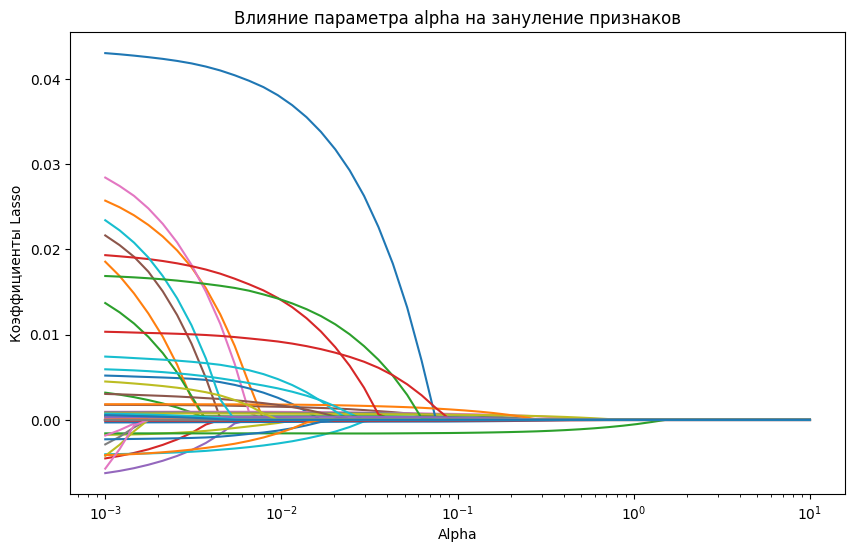

In [ ]:
alphas = np.logspace(-3, 1, 50)  # Значения alpha от 0.001 до 10
coef_list = []

# Обучение моделей Lasso с разными alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    coef_list.append(lasso.coef_)

# Визуализация изменения коэффициентов
plt.figure(figsize=(10, 6))
plt.plot(alphas, coef_list)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Коэффициенты Lasso")
plt.title("Влияние параметра alpha на зануление признаков")
plt.show()

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

# Метрики качества
def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}\n")

print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_gb, "Gradient Boosting")


Random Forest:
Accuracy: 0.9307
F1-Score: 0.9640

Gradient Boosting:
Accuracy: 0.9337
F1-Score: 0.9652



In [ ]:
# Оценка на всех признаках
print_metrics(y_test, y_pred_rf, "Random Forest (All Features)")
print_metrics(y_test, y_pred_gb, "Gradient Boosting (All Features)")

# Оценка только на значимых признаках (например, из Lasso)
rf.fit(X_train_lasso, y_train)
y_pred_rf_lasso = rf.predict(X_test_lasso)
print_metrics(y_test, y_pred_rf_lasso, "Random Forest (Lasso Features)")

Random Forest (All Features):
Accuracy: 0.9307
F1-Score: 0.9640

Gradient Boosting (All Features):
Accuracy: 0.9337
F1-Score: 0.9652

Random Forest (Lasso Features):
Accuracy: 0.9337
F1-Score: 0.9655



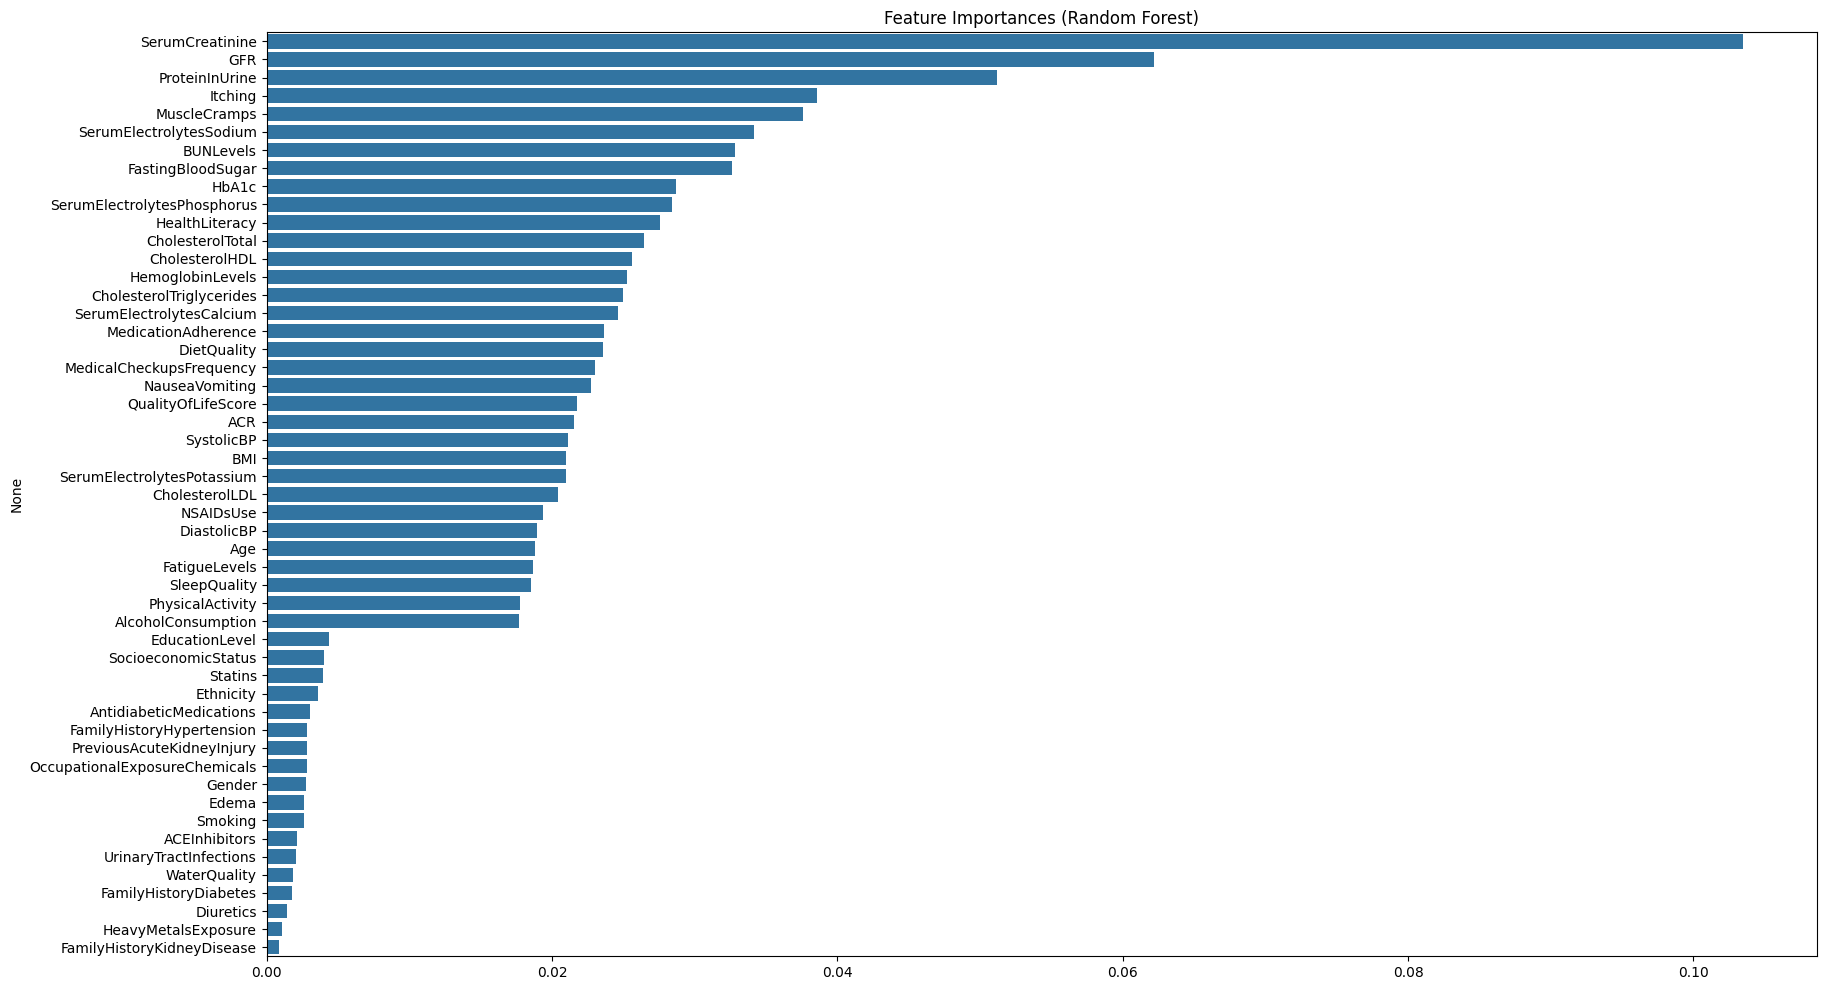

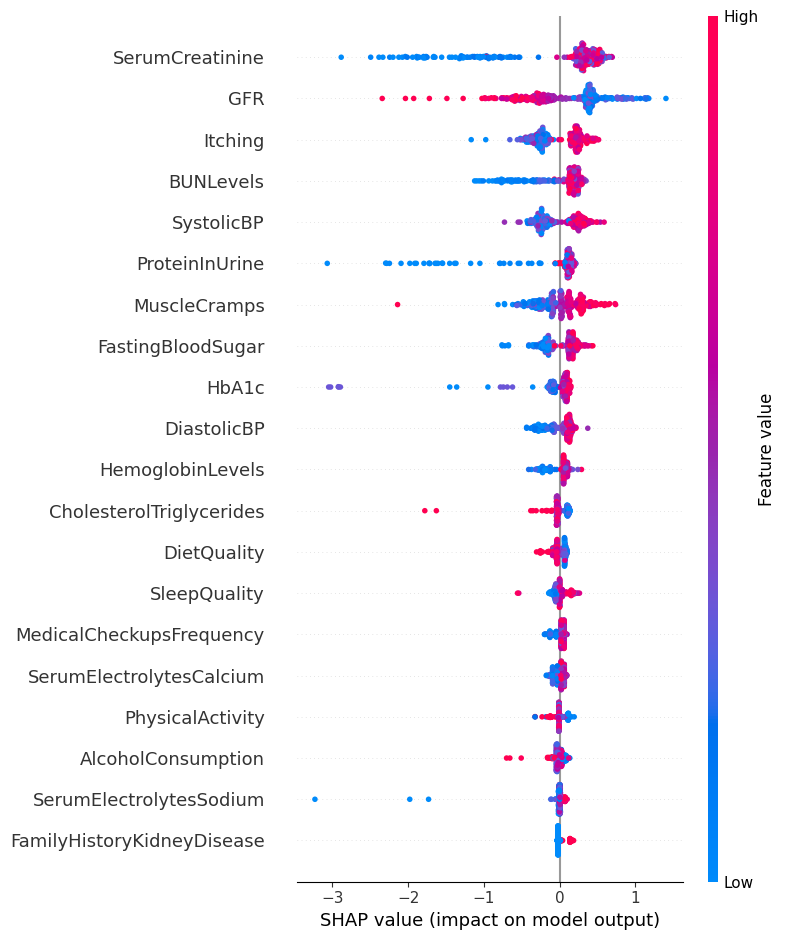

In [ ]:
# Feature importance (Random Forest)
X = df
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
importance_rf = rf.feature_importances_
sorted_indices = np.argsort(importance_rf)[::-1]
plt.figure(figsize=(20, 12))
sns.barplot(x=importance_rf[sorted_indices], y=X.columns[sorted_indices])
plt.title("Feature Importances (Random Forest)")
plt.show()

# SHAP values
explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

In [ ]:
# Обучение случайного леса на всех признаках
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Значимости признаков
feature_importances_rf = rf.feature_importances_

# Отбор индексов топ-10 признаков
top_10_rf_indices = np.argsort(feature_importances_rf)[-10:]

# Отобранные признаки
X_train_rf = pd.DataFrame(X_train_scaled, columns=df.columns).iloc[:, top_10_rf_indices]
X_test_rf = pd.DataFrame(X_test_scaled, columns=df.columns).iloc[:, top_10_rf_indices]

# Для справки - список топ-10 признаков
top_10_rf_features = pd.DataFrame(X_train_scaled, columns=df.columns).columns[top_10_rf_indices]
print("Топ-10 признаков (Random Forest):", top_10_rf_features)


Топ-10 признаков (Random Forest): Index(['SerumElectrolytesPhosphorus', 'HbA1c', 'FastingBloodSugar',
       'BUNLevels', 'SerumElectrolytesSodium', 'MuscleCramps', 'Itching',
       'ProteinInUrine', 'GFR', 'SerumCreatinine'],
      dtype='object')


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Обучение градиентного бустинга
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

# Значимости признаков
feature_importances_gb = gb.feature_importances_

# Отбор индексов топ-10 признаков
top_10_gb_indices = np.argsort(feature_importances_gb)[-10:]

# Отобранные признаки
X_train_gb = pd.DataFrame(X_train_scaled, columns=df.columns).iloc[:, top_10_gb_indices]
X_test_gb = pd.DataFrame(X_test_scaled, columns=df.columns).iloc[:, top_10_gb_indices]

# Для справки - список топ-10 признаков
top_10_gb_features = pd.DataFrame(X_train_scaled, columns=df.columns).columns[top_10_gb_indices]
print("Топ-10 признаков (Gradient Boosting):", top_10_gb_features)


Топ-10 признаков (Gradient Boosting): Index(['CholesterolTriglycerides', 'SerumElectrolytesSodium', 'HbA1c',
       'Itching', 'BUNLevels', 'FastingBloodSugar', 'MuscleCramps',
       'ProteinInUrine', 'SerumCreatinine', 'GFR'],
      dtype='object')


In [ ]:
# Random Forest с признаками, отобранными на основе RF feature_importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf, y_train)
y_pred_rf = rf_model.predict(X_test_rf)
print("Random Forest (top 10 RF features):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))

# Gradient Boosting с признаками, отобранными на основе GB feature_importance
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_gb, y_train)
y_pred_gb = gb_model.predict(X_test_gb)
print("\nGradient Boosting (top 10 GB features):")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("F1-Score:", f1_score(y_test, y_pred_gb))


Random Forest (top 10 RF features):
Accuracy: 0.9397590361445783
F1-Score: 0.9685534591194969

Gradient Boosting (top 10 GB features):
Accuracy: 0.927710843373494
F1-Score: 0.9619047619047619


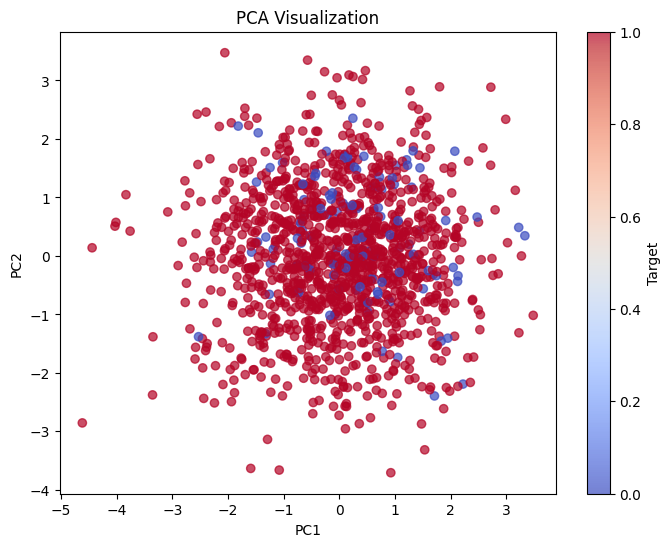

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Визуализация PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="coolwarm", alpha=0.7)
plt.title("PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Target")
plt.show()

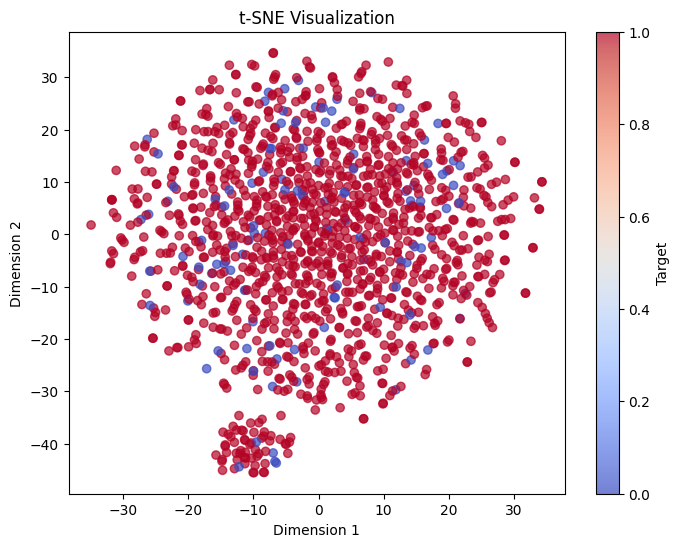

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

# Визуализация t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap="coolwarm", alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Target")
plt.show()

In [ ]:
# Использование SHAP для отбора признаков
shap_values = shap.TreeExplainer(RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train)).shap_values(X_train_scaled)[1]
shap_importances = np.abs(shap_values).mean(axis=0)
shap_top_indices = np.argsort(shap_importances)[-10:]  # Берем топ-10 признаков

X_train_shap = pd.DataFrame(X_train_scaled).iloc[:, shap_top_indices]
X_test_shap = pd.DataFrame(X_test_scaled).iloc[:, shap_top_indices]

In [ ]:
from sklearn.decomposition import PCA

# PCA: Снижение до 10 главных компонент
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
from sklearn.manifold import TSNE

# t-SNE: Снижение до 2 компонент
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

   Feature Selection  Accuracy  F1-Score
0       All Features  0.930723  0.964006
1  p-value Selection  0.939759  0.968553
2      SFS Selection  0.930723  0.964006
3     SHAP Selection  0.927711  0.962500
4      PCA Reduction  0.927711  0.962500
5    t-SNE Reduction  0.927711  0.962500


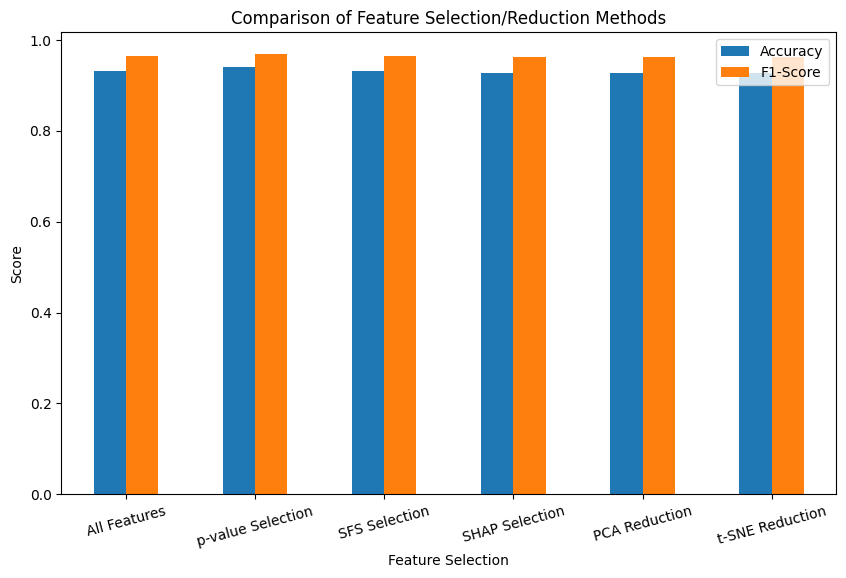

In [ ]:
rf_all = RandomForestClassifier(random_state=42)
rf_all.fit(X_train, y_train)
y_pred_all = rf_all.predict(X_test)

rf_significant = RandomForestClassifier(random_state=42)
rf_significant.fit(X_train_significant, y_train)
y_pred_significant = rf_significant.predict(X_test_significant)

rf_sfs = RandomForestClassifier(random_state=42)
rf_sfs.fit(X_train_sfs, y_train)
y_pred_sfs = rf_sfs.predict(X_test_sfs)

# Обучение моделей на SHAP, PCA, t-SNE
rf_shap = RandomForestClassifier(random_state=42)
rf_shap.fit(X_train_shap, y_train)
y_pred_shap = rf_shap.predict(X_test_shap)

rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)

rf_tsne = RandomForestClassifier(random_state=42)
rf_tsne.fit(X_train_tsne, y_train)
y_pred_tsne = rf_tsne.predict(X_test_tsne)

# Таблица с результатами
results = pd.DataFrame({
    "Feature Selection": [
        "All Features", "p-value Selection", "SFS Selection",
        "SHAP Selection", "PCA Reduction", "t-SNE Reduction"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_all),
        accuracy_score(y_test, y_pred_significant),
        accuracy_score(y_test, y_pred_sfs),
        accuracy_score(y_test, y_pred_shap),
        accuracy_score(y_test, y_pred_pca),
        accuracy_score(y_test, y_pred_tsne)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_all),
        f1_score(y_test, y_pred_significant),
        f1_score(y_test, y_pred_sfs),
        f1_score(y_test, y_pred_shap),
        f1_score(y_test, y_pred_pca),
        f1_score(y_test, y_pred_tsne)
    ]
})

# Вывод таблицы
print(results)

# Визуализация результатов
results.set_index("Feature Selection").plot(kind="bar", figsize=(10, 6), rot=15)
plt.title("Comparison of Feature Selection/Reduction Methods")
plt.ylabel("Score")
plt.show()